# Collection of diagnostic outputs

All diagnostic outputs from a DA simulation can be loaded at once using `DiagnosticCollection.from_pfs()`. 

In [1]:
from fmdap import DiagnosticCollection

In [2]:
fldr = '../tests/testdata/OresundHD2D_EnKF10/'
fn = fldr + 'OresundHD2D_EnKF10.m21fm'

In [3]:
dc = DiagnosticCollection.from_pfs(fn, folder=fldr)
dc

<DiagnosticCollection>
 - Viken: type:MeasurementPointDiagnostic, n:2258
 - Drogden: type:MeasurementPointDiagnostic, n:2258
 - Klagshamn: type:MeasurementPointDiagnostic, n:2258
 - Barsebaeck: type:MeasurementPointDiagnostic, n:2258
 - Diagnostics_wlbc_err_North: type:NonMeasurementPointDiagnostic, n:2258
 - Diagnostics_wlbc_err_South: type:NonMeasurementPointDiagnostic, n:2258

In [4]:
dc.result.skill().style()

,selection,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,,
Viken,result,1153,0.008,0.041,0.040,0.013,0.919,0.262,0.835
Drogden,result,574,-0.006,0.027,0.026,0.023,0.928,0.215,0.807
Klagshamn,result,97,-0.002,0.014,0.014,0.012,0.982,0.133,0.949
Barsebaeck,result,97,-0.016,0.035,0.031,0.027,0.932,0.208,0.829


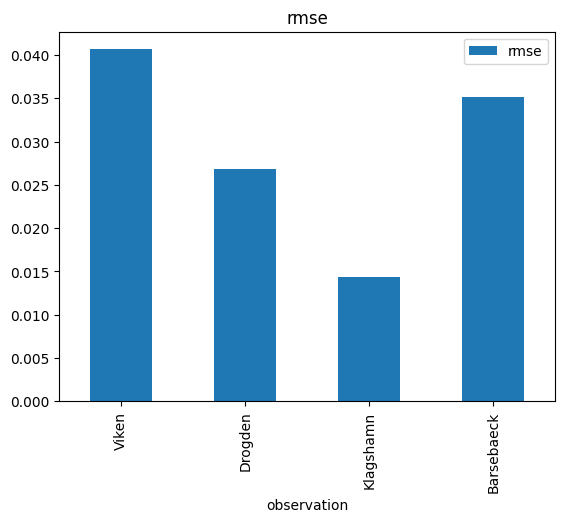

In [5]:
dc.result.skill().rmse.plot.bar();

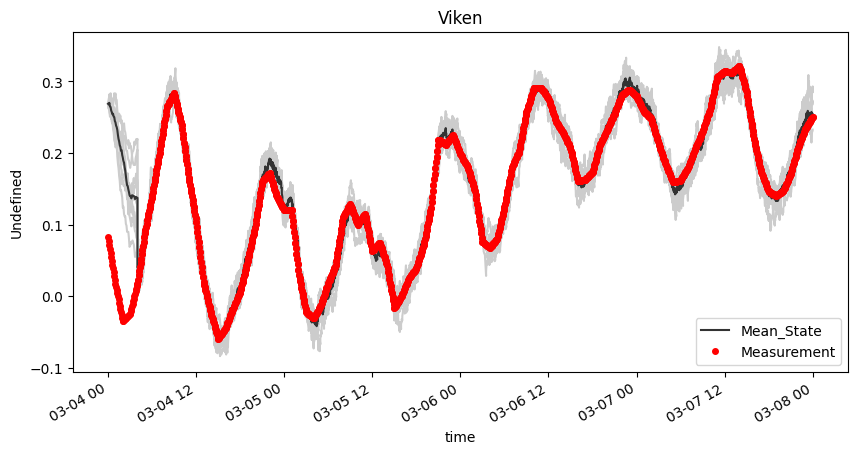

In [6]:
dc["Viken"].plot();

Looks like we better skip the first few hours of our comparison...

In [7]:
# TODO
# dc.result.skill(start="2018-3-4 6:00").style()

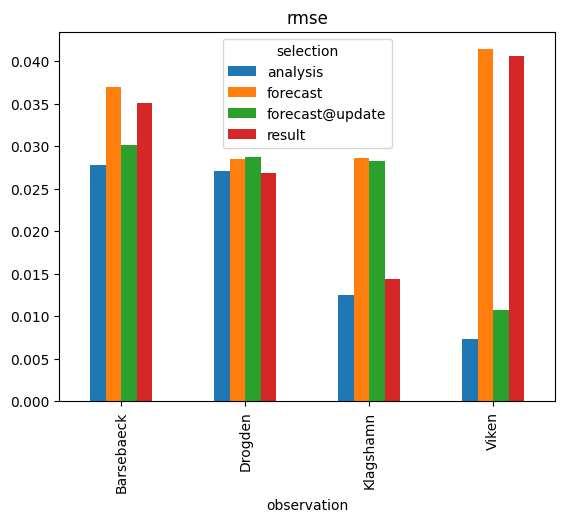

In [8]:
dc.skill().rmse.plot.bar(level=1);

In [9]:
dc.result.rmse

,rmse
Viken,0.040659
Drogden,0.026895
Klagshamn,0.014383
Barsebaeck,0.035106
Diagnostics_wlbc_err_North,NaN
Diagnostics_wlbc_err_South,NaN


In [10]:
df = dc.forecast_at_update.ensemble_std.join(dc.analysis.ensemble_std, lsuffix="_forecast", rsuffix="_analysis")
df["relative_change"] = (df.ensemble_std_analysis - df.ensemble_std_forecast)/df.ensemble_std_forecast
df

,ensemble_std_forecast,ensemble_std_analysis,relative_change
Viken,0.013465,0.011906,-0.115815
Drogden,0.018613,0.018073,-0.029014
Klagshamn,0.019801,0.019215,-0.029604
Barsebaeck,0.009708,0.009499,-0.021602
Diagnostics_wlbc_err_North,0.012663,0.011590,-0.084778
Diagnostics_wlbc_err_South,0.018193,0.017789,-0.022208
